# PAID: (Prompt-guided) Attention Interpolation of Text-to-Image Diffusion

Author: Qiyuan He $^1$ Jinghao Wang $^2$ Ziwei Liu $^2$ Angela Yao $^1$

$^1$ National University of Singapore 

$^2$ S-Lab, Nanyang Technological University

In [ ]:
import torch

from pipeline_interpolated_sdxl import InterpolationStableDiffusionXLPipeline
from prior import BetaPriorPipeline
from utils import image_grids


xl_pipe = InterpolationStableDiffusionXLPipeline.from_pretrained(
    "playgroundai/playground-v2.5-1024px-aesthetic", torch_dtype=torch.float16
)
generator = torch.cuda.manual_seed(1002)
dtype = torch.float16
xl_pipe.to("cuda", dtype=dtype)
beta_pipe = BetaPriorPipeline(xl_pipe)

In [2]:
size = xl_pipe.default_sample_size
latent_start = torch.randn((1, 4, size, size,), device="cuda", dtype=dtype, generator=generator)
latent_end = torch.randn((1, 4, size, size,), device="cuda", dtype=dtype, generator=generator)

  0%|          | 0/28 [00:00<?, ?it/s]

Alpha: 3 | Beta: 3 | Current Coefs: [0.0, 0.5, 1.0] | Current Distances: [tensor(0.1147), tensor(0.2031)]


  0%|          | 0/28 [00:00<?, ?it/s]

--------Exploration: 4 / 7--------
Alpha: 22.738671128055913 | Beta: 20.104530895861043 | Current Coefs: [0.0, 0.5, 0.6405638352103529, 1.0] | Current Distances: [tensor(0.1147), tensor(0.1962), tensor(0.0243)]


  0%|          | 0/28 [00:00<?, ?it/s]

--------Exploration: 5 / 7--------
Alpha: 81.50279619251592 | Beta: 76.24146777156061 | Current Coefs: [0.0, 0.5, 0.5575801374463876, 0.6405638352103529, 1.0] | Current Distances: [tensor(0.1147), tensor(0.1750), tensor(0.0268), tensor(0.0243)]


  0%|          | 0/28 [00:00<?, ?it/s]

--------Exploration: 6 / 7--------
Alpha: 328.5629587858297 | Beta: 317.5566332598327 | Current Coefs: [0.0, 0.5, 0.526082702243523, 0.5575801374463876, 0.6405638352103529, 1.0] | Current Distances: [tensor(0.1147), tensor(0.1802), tensor(0.0076), tensor(0.0268), tensor(0.0243)]


  0%|          | 0/28 [00:00<?, ?it/s]

--------Exploration: 7 / 7--------
Alpha: 319.8526656085471 | Beta: 311.9871651619284 | Current Coefs: [0.0, 0.5, 0.5121578779735625, 0.526082702243523, 0.5575801374463876, 0.6405638352103529, 1.0] | Current Distances: [tensor(0.1147), tensor(0.1073), tensor(0.0525), tensor(0.0076), tensor(0.0268), tensor(0.0243)]
Optimal smooth path: [0, 1, 2, 3, 6]


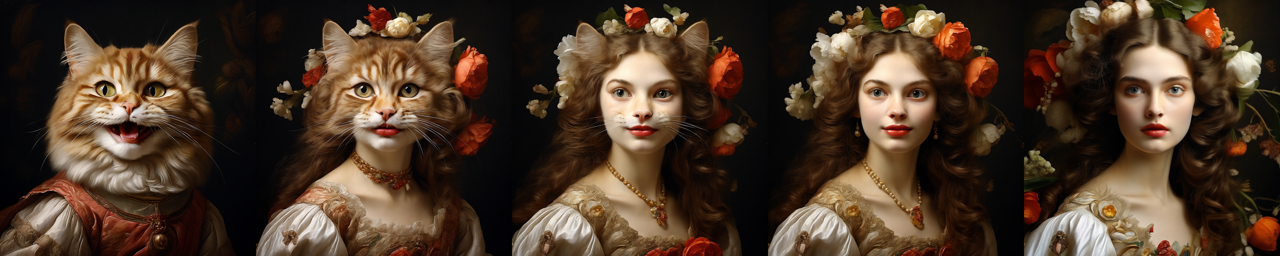

In [3]:
prompt_a = "masterpiece, best quality, very aesthetic, absurdres, A cat is smiling, face portrait"
prompt_b = "masterpiece, best quality, very aesthetic, absurdres, A beautiful lady, face portrait"
negative_prompt = "nsfw, lowres, (bad), text, error, fewer, extra, missing, worst quality, jpeg artifacts, low quality, watermark, unfinished, displeasing, oldest, early, chromatic aberration, signature, extra digits, artistic error, username, scan, [abstract]" # "deformed, ugly, wrong proportion, low res, bad anatomy, worst quality, low quality"
interpolation_size = 5
num_inference_steps = 28

images = beta_pipe.generate_interpolation(
    prompt_a,
    prompt_b,
    negative_prompt,
    latent_end,
    latent_end,
    num_inference_steps,
    exploration_size=int(interpolation_size * 1.5),
    interpolation_size=interpolation_size,
    warmup_ratio=1.0
)

show_image = image_grids(images, 1, interpolation_size).resize((interpolation_size * 256, 256))
show_image

  0%|          | 0/28 [00:00<?, ?it/s]

Alpha: 3 | Beta: 3 | Current Coefs: [0.0, 0.5, 1.0] | Current Distances: [tensor(0.3252), tensor(0.0890)]


  0%|          | 0/28 [00:00<?, ?it/s]

--------Exploration: 4 / 7--------
Alpha: 26.98272756372406 | Beta: 33.6478009164893 | Current Coefs: [0.0, 0.3594361647896471, 0.5, 1.0] | Current Distances: [tensor(0.0403), tensor(0.3294), tensor(0.0890)]


  0%|          | 0/28 [00:00<?, ?it/s]

--------Exploration: 5 / 7--------
Alpha: 36.146579705646346 | Beta: 50.903262964671484 | Current Coefs: [0.0, 0.3594361647896471, 0.4358783744673458, 0.5, 1.0] | Current Distances: [tensor(0.0403), tensor(0.2935), tensor(0.0324), tensor(0.0890)]


  0%|          | 0/28 [00:00<?, ?it/s]

--------Exploration: 6 / 7--------
Alpha: 28.223268123221256 | Beta: 39.853327075927055 | Current Coefs: [0.0, 0.3594361647896471, 0.40124190374881574, 0.4358783744673458, 0.5, 1.0] | Current Distances: [tensor(0.0403), tensor(0.1533), tensor(0.1117), tensor(0.0324), tensor(0.0890)]


  0%|          | 0/28 [00:00<?, ?it/s]

--------Exploration: 7 / 7--------
Alpha: 36.73183752999456 | Beta: 54.12703130964319 | Current Coefs: [0.0, 0.3594361647896471, 0.3822130396713899, 0.40124190374881574, 0.4358783744673458, 0.5, 1.0] | Current Distances: [tensor(0.0403), tensor(0.1514), tensor(0.0607), tensor(0.1117), tensor(0.0324), tensor(0.0890)]
Optimal smooth path: [0, 2, 3, 4, 6]


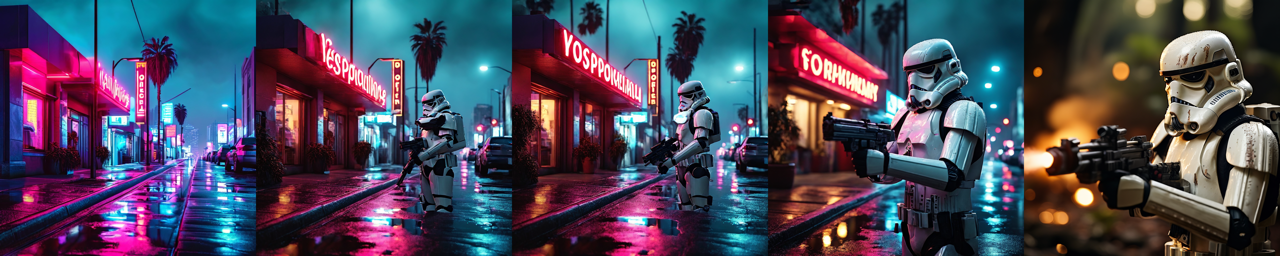

In [4]:
prompt_b = "cinematic film still, stormtrooper taking aim. shallow depth of field, vignette, highly detailed, high budget Hollywood movie, bokeh, cinemascope, moody, epic, gorgeous, film grain, grainyCopied!"
prompt_a = "vaporwave synthwave style Los Angeles street. cyberpunk, neon, vibes, stunningly beautiful, crisp, detailed, sleek, ultramodern, high contrast, cinematic composition"

images = beta_pipe.generate_interpolation(
    prompt_a,
    prompt_b,
    negative_prompt,
    latent_end,
    latent_end,
    num_inference_steps,
    exploration_size=int(interpolation_size * 1.5),
    interpolation_size=interpolation_size,
    warmup_ratio=1.0
)

show_image = image_grids(images, 1, interpolation_size).resize((interpolation_size * 256, 256))
show_image